In [1]:
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

from u_net_implementation import simple_unet_model   #Use normal unet model
from keras.utils.np_utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_directory = 'training'
mask_directory = 'training_groundtruth'

In [3]:
SIZE = 256
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

In [4]:
os.chdir(r'E:\programing\ML project\practice (reference)\unetmitrocondia\training\train')
for f in os.listdir():
    if (f.endswith('.jpg')):
        #print(image_directory+image_name)
        image = Image.open(f)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

In [5]:
len(image_dataset)

330

In [6]:
os.chdir(r'E:\programing\ML project\practice (reference)\unetmitrocondia\training_groundtruth')
for f in os.listdir():    #Remember enumerate method adds a counter and returns the enumerate object
    if (f.endswith('.jpg')):
        #print(image_directory+image_name)
        image = Image.open(f)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

In [7]:
len(mask_dataset)

330

In [8]:
#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [9]:
image_dataset.shape

(330, 256, 256, 1)

In [10]:
mask_dataset.shape

(330, 256, 256, 1)

In [11]:
os.chdir(r'E:\programing\ML project\practice (reference)\unetmitrocondia')
image_dataset.shape

(330, 256, 256, 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

In [13]:
X_train.shape

(297, 256, 256, 1)

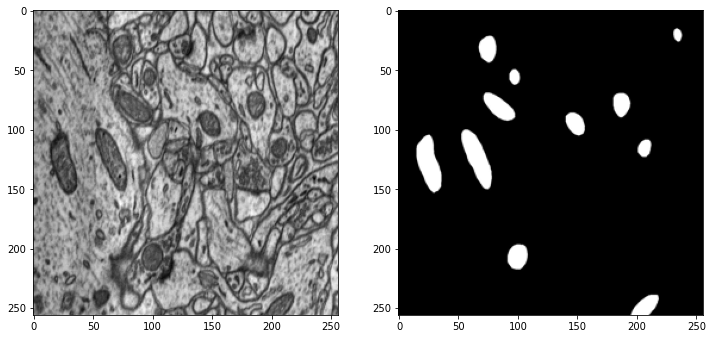

In [14]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [15]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

In [16]:
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [17]:
model = get_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [18]:
#If starting with pre-trained weights. 
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')

In [19]:
history = model.fit(X_train, y_train, batch_size = 16, verbose=1, epochs=1, 'validation_data=(X_test, y_test)'s, shuffle=False)

19/19 [==============================] - 81s 4s/step - loss: 0.2883 - accuracy: 0.9205


In [20]:
model.save('mitochondria_test.hdf5')

In [21]:
# evaluate model
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

2/2 [==============================] - 2s 71ms/step - loss: 0.2435 - accuracy: 0.9322
Accuracy =  93.21908950805664 %


In [22]:
img = Image.open('test_image1.jpg')
img= img.resize((SIZE, SIZE))
img.show()
test_result=[]
test_result.append(np.array(img))
practice_dataset = np.expand_dims(normalize(np.array(test_result), axis=1),3)

In [23]:
practice_dataset.shape

(1, 256, 256, 1)

In [24]:
y_pridicted = model.predict(practice_dataset)

In [25]:
img.show()

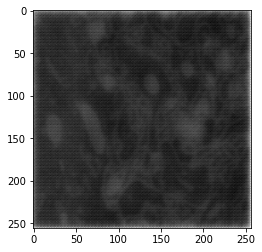

In [26]:
plt.imshow(np.reshape(y_pridicted, (256, 256)), cmap='gray')